# Plotting Notebook.

Subsequent code frame loads all important variables for us to play with

In [11]:
import matplotlib.pyplot
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

from benchmark.benchmark_validators import BenchmarkRun
from benchmark.config import get_config
from benchmark.results_processing import load_benchmark_run, create_dataframe, print_statistics

# Get the config from the config factory. (If you don't have a config, consider instantiating a config object here)
# config = BenchmarkConfig(...)
config = get_config()

filename = "2025-06-09/pcbm_20250609-160559_YfMFhLG8S70lT0b0uyjIbpQ5LO5mUeqes8VT9ZIhjFs=.json"

bmr: BenchmarkRun = load_benchmark_run(config=config, path=filename)
bmr_dtf = create_dataframe(bmr)

# Set interactive plotting mode
matplotlib.pyplot.ion()

Prepare some common plots

In [14]:
# Module VS Runtimeny:
bmr_dtf["group-cpu-nx-ny"] = bmr_dtf.apply(lambda row: f"cpu:{row.cpu_count} nx:{row.nx} ny:{row.ny}", axis=1)

Benchmark Results of VX Benchmark
Module                cpu_count    nx    ny    runtime std:    runtime avg    runtime std norm:    runtime avg norm    number of samples
------------------  -----------  ----  ----  --------------  -------------  -------------------  ------------------  -------------------
base_rb_gs                    8   128   128     0.00172628      0.00440873          8.23153e-10         2.10225e-09                   15
base_rb_gs                    8   256   256     0.00093568      0.0168679           1.11542e-10         2.01081e-09                   15
base_rb_gs                    8   512   512     0.0102315       0.0637177           3.04922e-10         1.89894e-09                   15
base_rb_gs                    8  1024  1024     0.0121634       0.241136            9.06245e-11         1.7966e-09                    15
base_rb_gs                    8  2048  2048     0.15739         2.60816             2.93161e-10         4.85808e-09                   15
base_rb

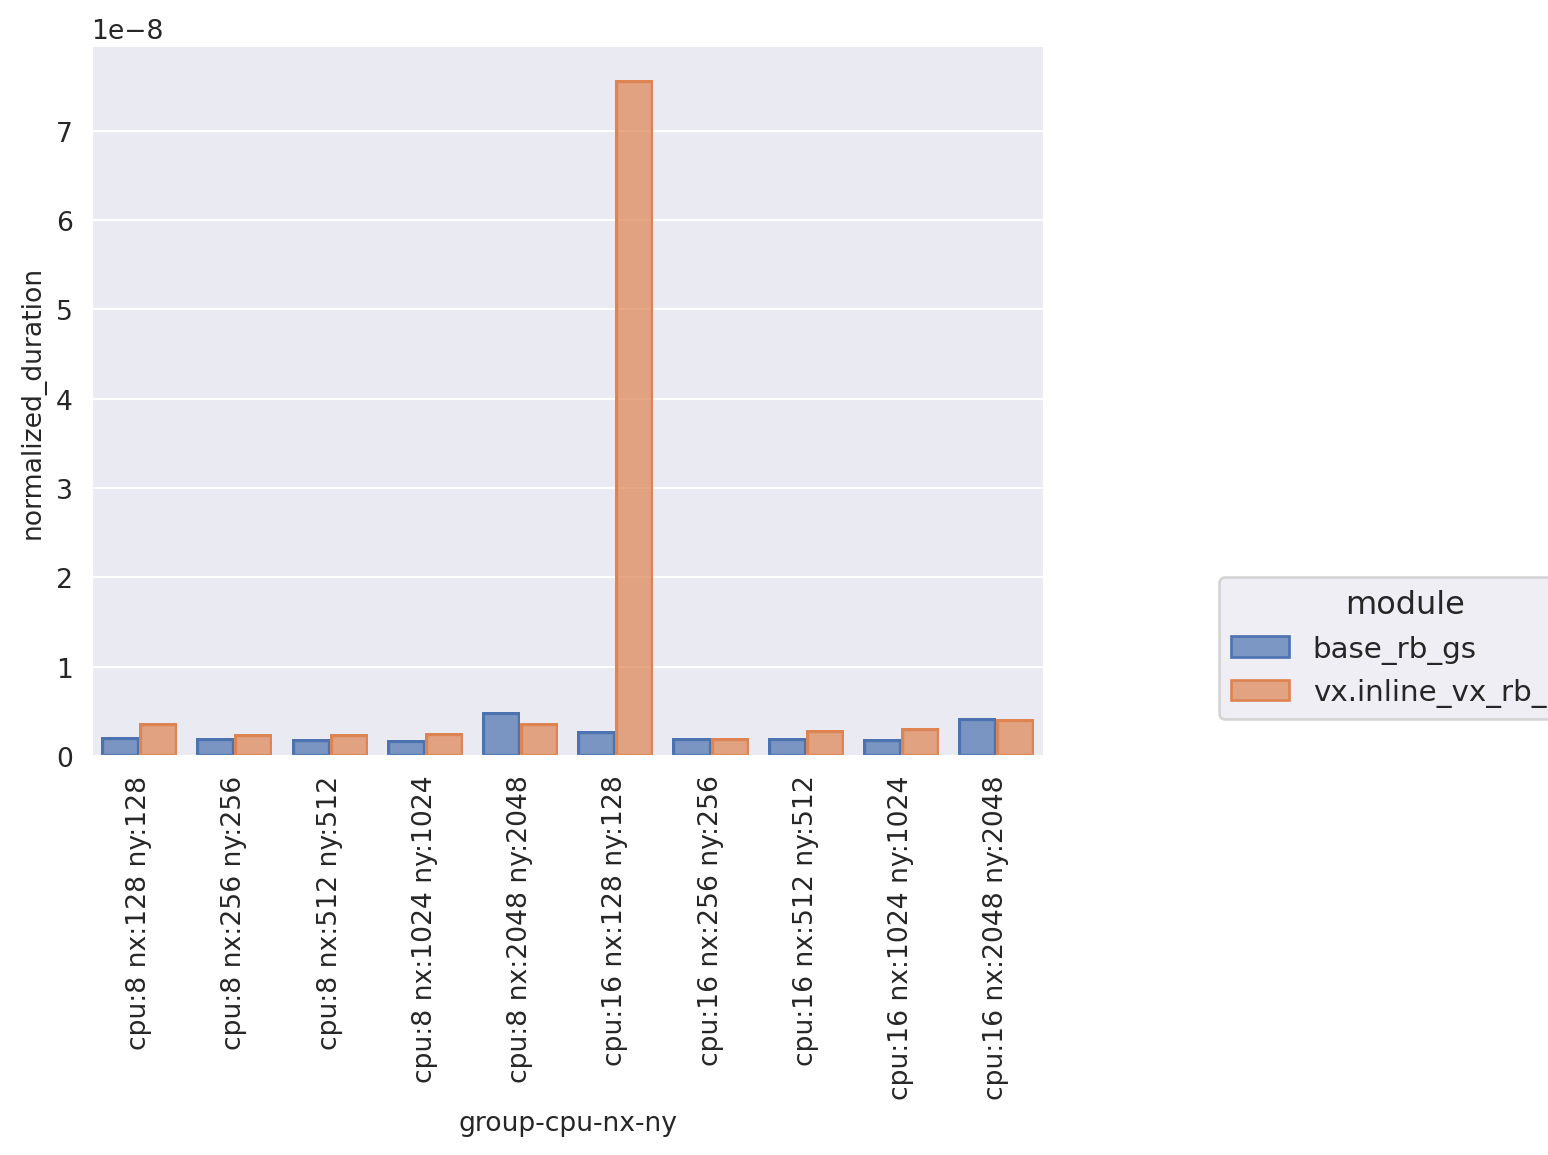

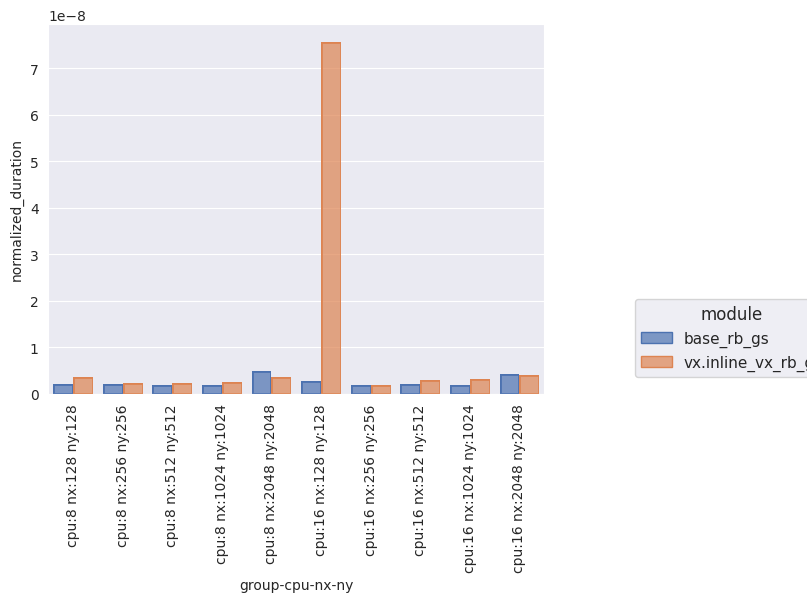

In [16]:
print_statistics(run=bmr)
print(bmr_dtf)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.xaxis.set_tick_params(rotation=90)

(so.Plot(bmr_dtf, x="group-cpu-nx-ny", y="normalized_duration", color="module").add(so.Bar(), so.Agg(), so.Dodge()).on(ax))

# sns.relplot(data=bmr_dtf, x="nx", y="normalized_duration", col="cpu_count", kind="line")